In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import daft
import seaborn
import matplotlib.pyplot as plt


........AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


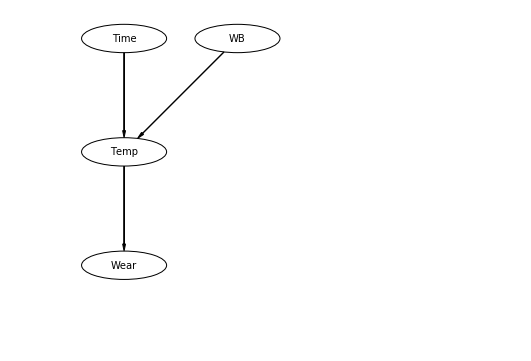

In [2]:
pgm = daft.PGM([9,6],origin=[1, 0.5])
pgm.add_node(daft.Node('Tme','Time',3,6,aspect=3))
pgm.add_node(daft.Node('WB','WB',5,6,aspect=3))
pgm.add_node(daft.Node('Temp','Temp',3,4,aspect=3))
pgm.add_node(daft.Node('Wear','Wear',3,2,aspect=3))
pgm.add_edge('Tme','Temp')
pgm.add_edge('WB','Temp')
pgm.add_edge('Temp','Wear')
pgm.render();


In [3]:
df = pd.read_csv('C:/Users/DESUSAI/Desktop/New folder/Temp.csv',sep=';')

df.index

RangeIndex(start=0, stop=15, step=1)

In [4]:
df.describe()

,Time,Temp,RunningTemp,Wear,Slot
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.466667,146.666667,212.533333,17.133333,8.000000
std,0.639940,63.994047,63.482131,5.208052,4.472136
min,1.000000,100.000000,152.000000,12.000000,1.000000
25%,1.000000,100.000000,163.000000,13.000000,4.500000
50%,1.000000,100.000000,193.000000,16.000000,8.000000
75%,2.000000,200.000000,250.500000,20.000000,11.500000
max,3.000000,300.000000,383.000000,31.000000,15.000000


In [5]:
temp_mean= df.Temp.mean()
temp_mean

146.66666666666666

In [6]:
df.skew()

Time           1.084627
Temp           1.084627
RunningTemp    1.473369
Wear           1.428295
Slot           0.000000
dtype: float64

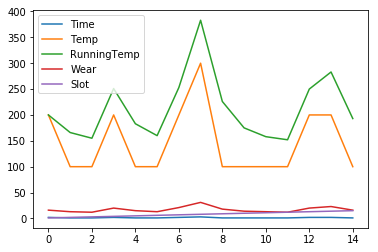

In [7]:
df.plot()
plt.show()

In [8]:
df.std

<bound method DataFrame.std of     Time  Temp  RunningTemp  Wear  Slot
0      2   200          200    16     1
1      1   100          166    13     2
2      1   100          155    12     3
3      2   200          251    20     4
4      1   100          183    15     5
5      1   100          160    13     6
6      2   200          253    21     7
7      3   300          383    31     8
8      1   100          226    18     9
9      1   100          175    14    10
10     1   100          158    13    11
11     1   100          152    12    12
12     2   200          250    20    13
13     2   200          283    23    14
14     1   100          193    16    15>

In [9]:
model = pm.Model();
with model:
    time = pm.Normal('time',mu=df.Time.mean(),sd=df.Time.std())
    temp = pm.Normal('temp',mu=time)
    wear =pm.Normal('wear',mu=temp)
    trace = pm.sample(100000,tune=50000,progressbar=True)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
......AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|████████████████████████████████| 150000/150000 [02:14<00:00, 1118.96it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E5E9DD8>,
      dtype=object)

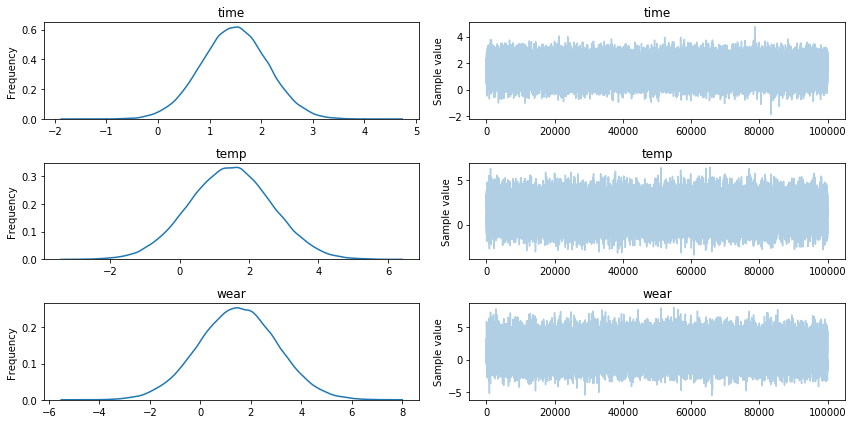

In [10]:
pm.traceplot(trace)

In [11]:
pm.summary(trace)


time:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.462            0.640            0.003            [0.230, 2.746]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.199          1.032          1.464          1.892          2.719


temp:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.461            1.188            0.006            [-0.916, 3.734]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.869         0.659          1.463          2.260          3.784


wear:

  Mean             SD               MC Error         95% HPD interval
  ---------------------------

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E77BE48>,
      dtype=object)

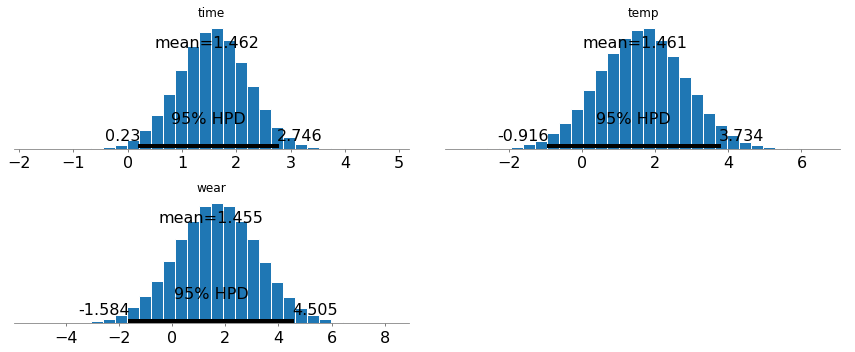

In [12]:
pm.plot_posterior(trace)

In [13]:
pred = pd.DataFrame({
    "Wear": trace["wear"][50000:],
    "Temp": trace["temp"][50000:],
    "Time": trace["time"][50000],
 
})


In [14]:
pred.Wear.mean()


1.4461012161391942

In [15]:
pred.Temp.mean()
loopTime = pred.Time.mean()
loopWear = pred.Wear.mean()
loopTemp = pred.Temp.mean()

In [16]:
loopWear

1.4461012161391942

In [17]:
loopTemp

1.457532305983312

In [18]:
loopTime

-0.6038316749917411

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
.....AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|█████████████████████████████████| 150000/150000 [02:32<00:00, 984.74it/s]


0.8489766963717487

Time2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.609           1.001            0.005            [-2.597, 1.329]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -2.578         -1.284         -0.607         0.066          1.353


Temp2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.836            1.410            0.007            [-1.969, 3.547]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.938         -0.113         0.835          1.796          3.582


wear2:

  Mean             SD               MC Error         95% HPD interval
  ----

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
........AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|█████████████████████████████████| 150000/150000 [02:40<00:00, 932.03it/s]


0.8604762415678179

Time2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.601           1.000            0.005            [-2.608, 1.313]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -2.562         -1.276         -0.600         0.070          1.367


Temp2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.848            1.412            0.007            [-1.912, 3.607]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.912         -0.104         0.840          1.798          3.608


wear2:

  Mean             SD               MC Error         95% HPD interval
  ----

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████| 150000/150000 [02:41<00:00, 929.05it/s]


0.8429564117075297

Time2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.602           0.997            0.005            [-2.573, 1.340]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -2.565         -1.271         -0.603         0.069          1.355


Temp2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.844            1.418            0.007            [-1.932, 3.600]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.914         -0.118         0.841          1.800          3.622


wear2:

  Mean             SD               MC Error         95% HPD interval
  ----

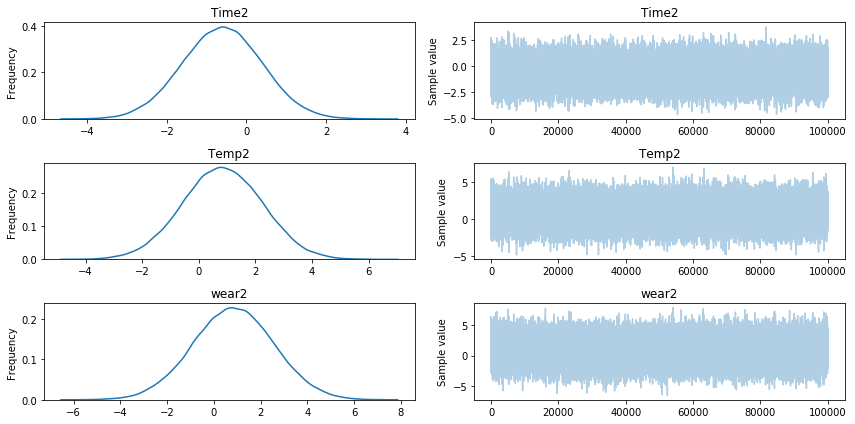

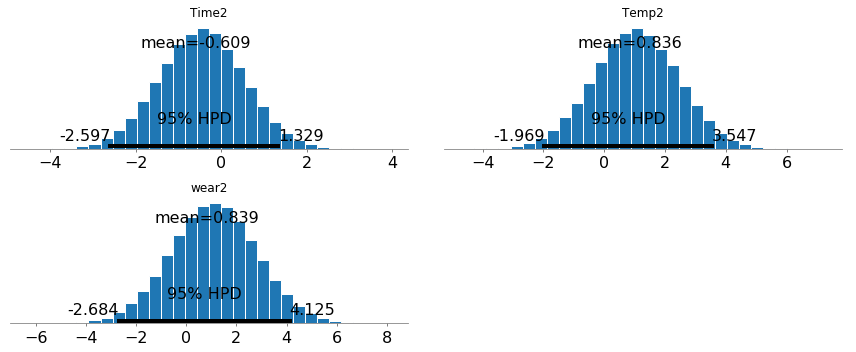

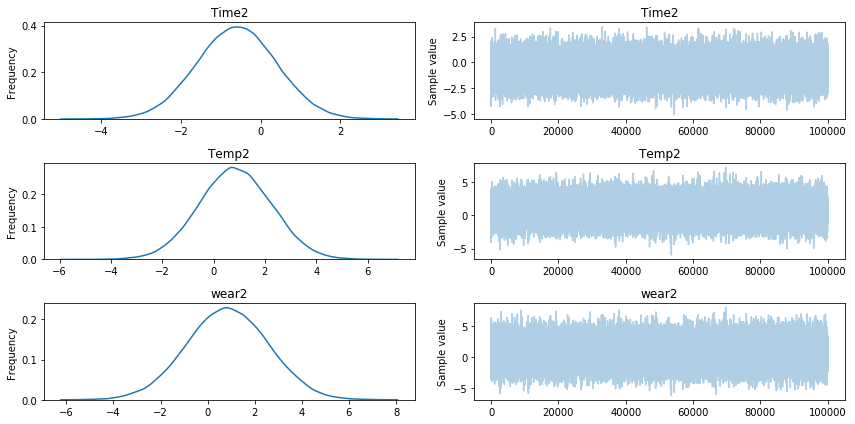

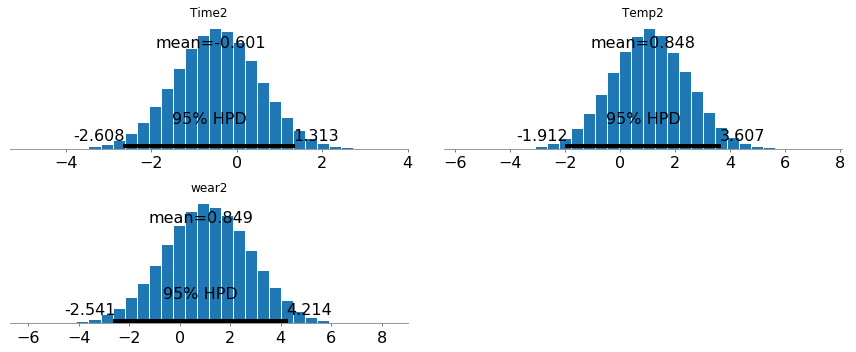

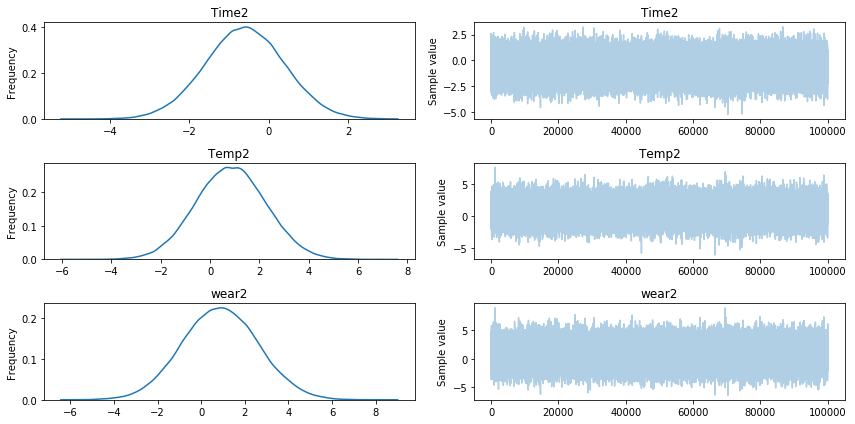

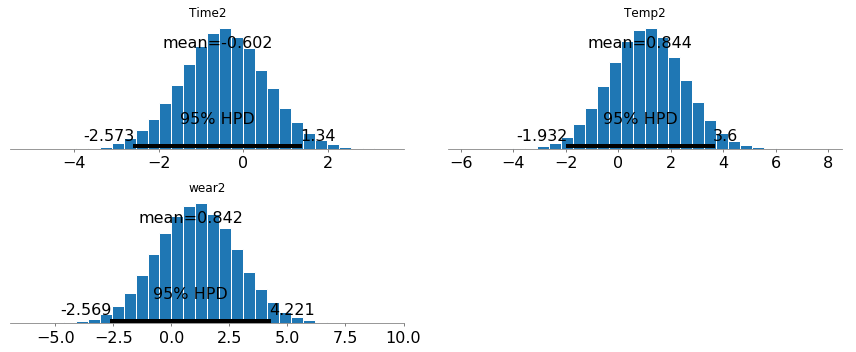

In [19]:
def mymodel(x,y):
    model2 = pm.Model();
    with model2:
        Time2  = pm.Normal('Time2',mu=x)
        Temp2  = pm.Normal('Temp2',mu=Time2+y)
        wear2  = pm.Normal('wear2',mu=Temp2)
        trace2 = pm.sample(100000,tune=50000,progressbar=True)
        pred2  = pd.DataFrame({
        "Wear2": trace2["wear2"][50000:],
        "temp2": trace2["Temp2"][50000:],
        "time2": trace2["Time2"][50000:],
        })
        loopTime = pred2.time2.mean()
        loopWear = pred2.Wear2.mean()
        
        print(loopWear)
        pm.traceplot(trace2)
        pm.summary(trace2)
        pm.plot_posterior(trace2)
        
for i in range(0,3):
    mymodel(loopTime,loopWear)
    
    
    
    